# 贷款批准预测: 

## 探索性数据分析 （EDA） + 模型分析（Modeling）+ 模型评价 （Model Evaluation）


### 问题描述:

#### 关于公司
公司处理所有住房贷款。他们遍布所有城市、半城市和农村地区。客户在该公司验证客户贷款资格后首先申请房屋贷款。
#### 问题
公司希望根据填写在线申请表时提供的客户详细信息自动化贷款资格流程（实时）。这些详细信息包括性别、婚姻状况、教育、受抚养人数量、收入、贷款金额、信用记录等。为了自动化此过程，他们提出了一个问题来识别客户群，这些客户群有资格获得贷款金额，以便他们可以专门针对这些客户。


## 导入数据库，检查数据基本信息

In [13]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 重复值检查

In [14]:
data[data.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [15]:
############ Count number of Categorical and Numerical Columns ######################
data = data.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

### 分析字符型变量

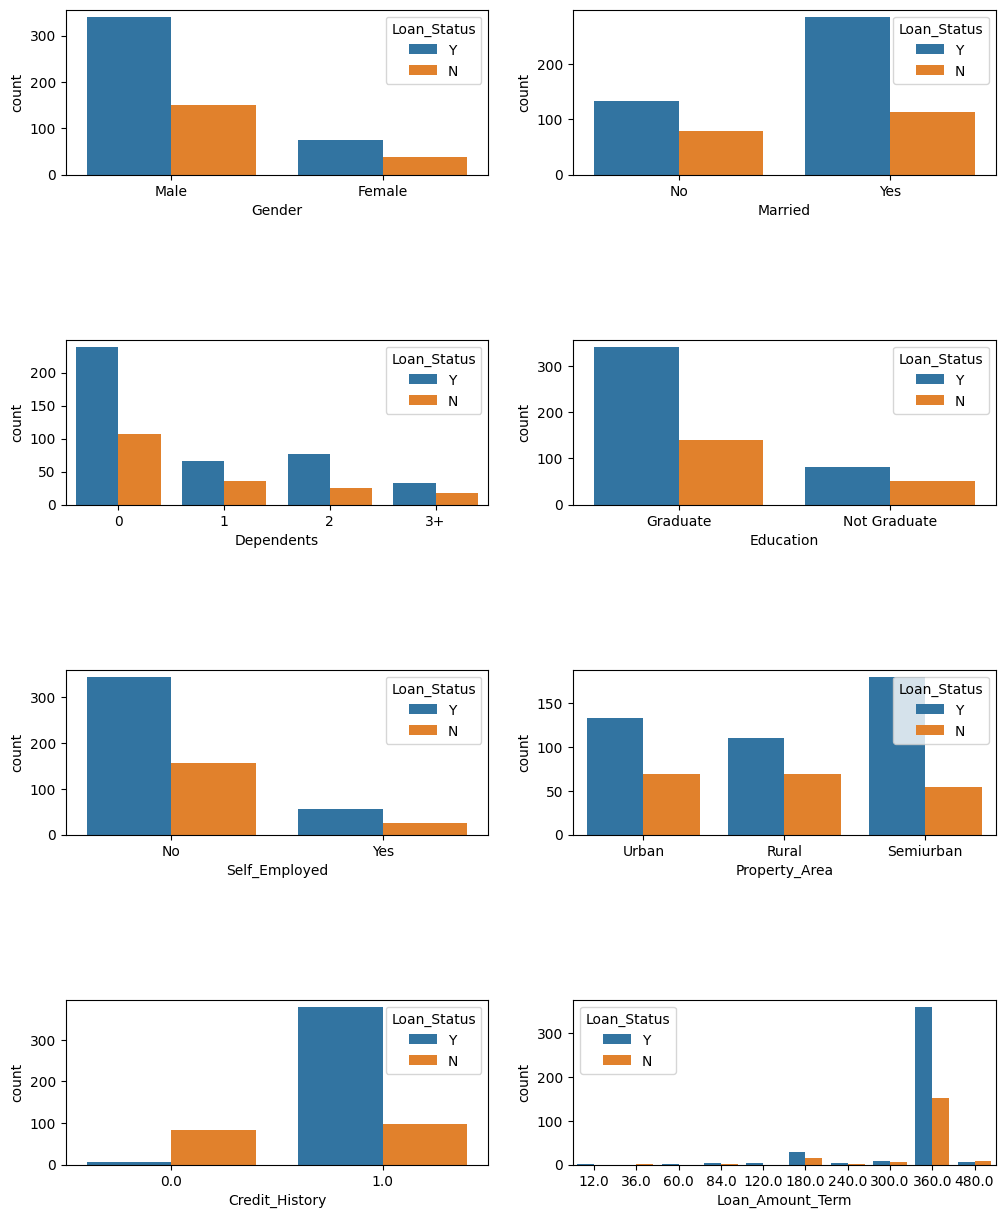

In [16]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

#### 上面的图传达了有关数据集的以下信息：
1. 贷款审批状态：约2/3的申请人已获得贷款。
2. 性别：男性多于女性（约3倍）
3. 婚姻状态：数据集中 2/3 的人口被破坏;已婚申请人更有可能获得贷款。
4. 受抚养人：大多数人的受抚养人为零，也有可能接受贷款。
5. 学历：约5/6的人口是研究生，毕业生的贷款审批能力更高
6. 就业：5/6的人口不是自雇人士。
7. 物业面积：更多来自半城市地区的申请人，也有可能获得贷款。
8. 有信用记录的申请人更有可能被接受。
9. 贷款金额期限：大部分贷款为期360个月（30年）。


In [17]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 分析数值型变量

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


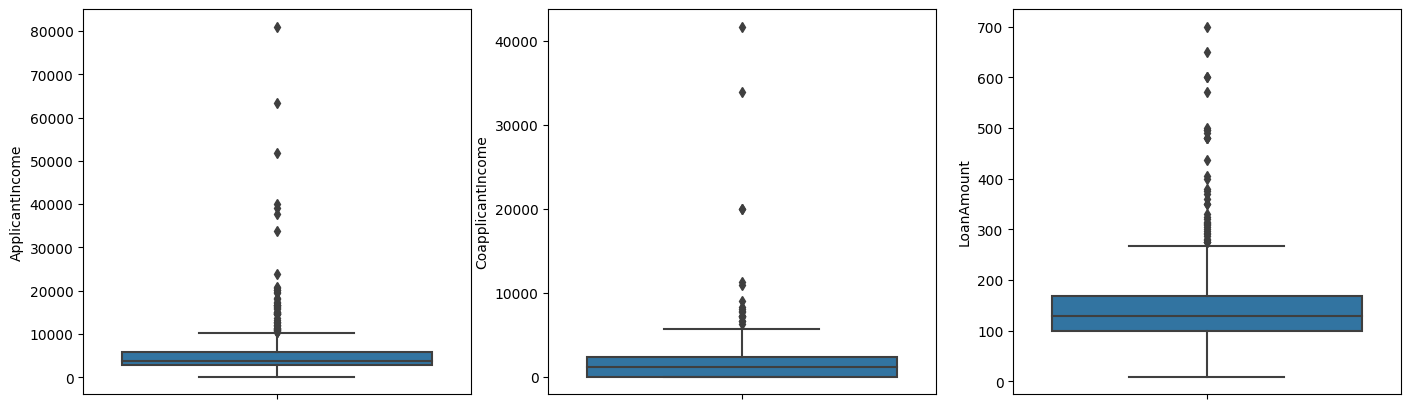

In [18]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

对于数值型变量进行分析我们不难看出，其与贷款批准状态没有显著关系。

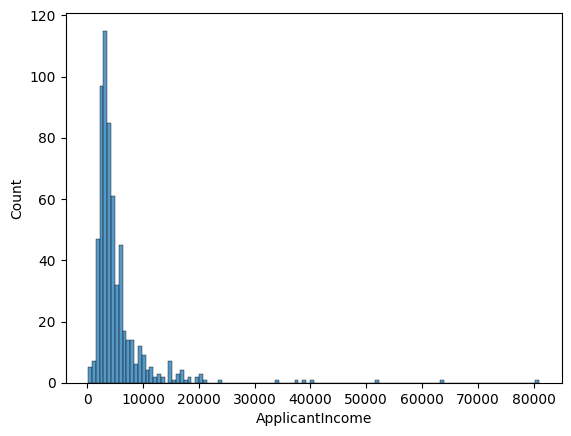

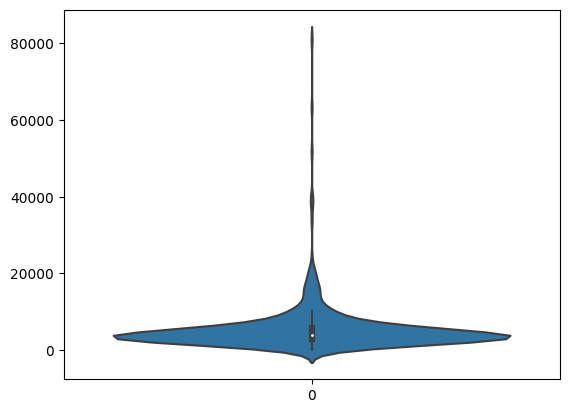

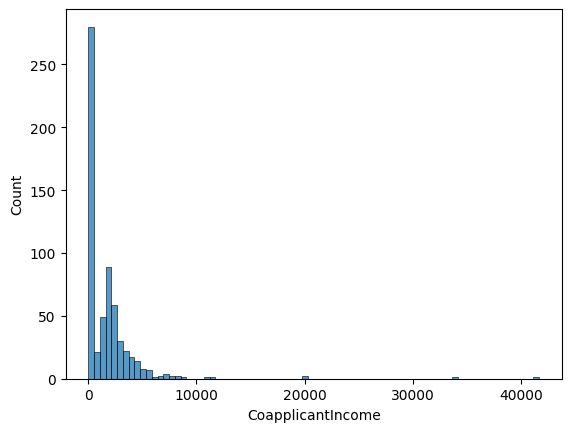

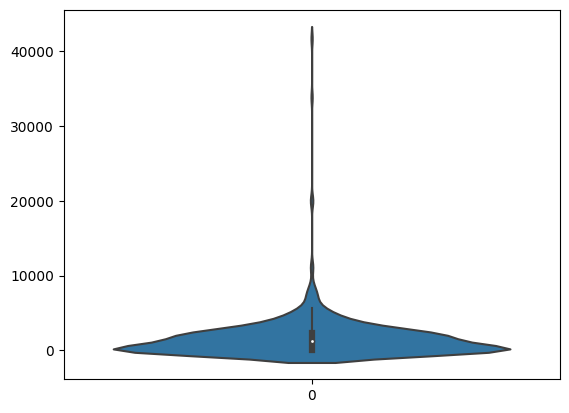

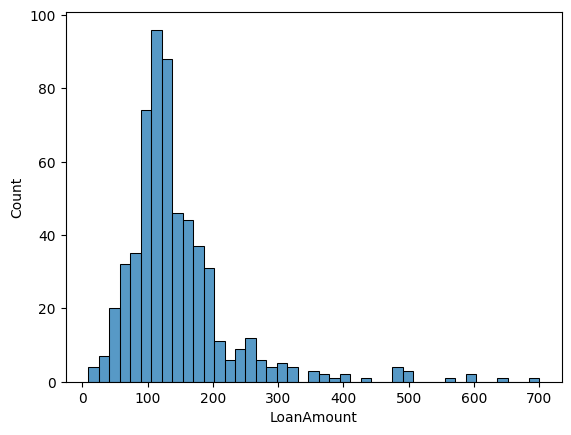

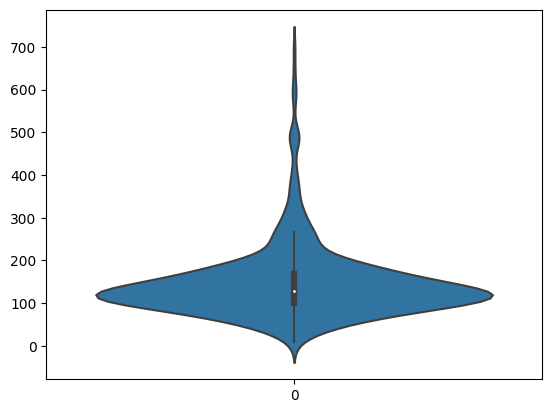

In [19]:
#查看数值特征的一个分布，根据分布看是否要对特征进行一些处理。
for idx,cat_col in enumerate(numerical_columns):
    sns.histplot(data[cat_col])
    plt.show()
    sns.violinplot(data[cat_col])
    plt.show()

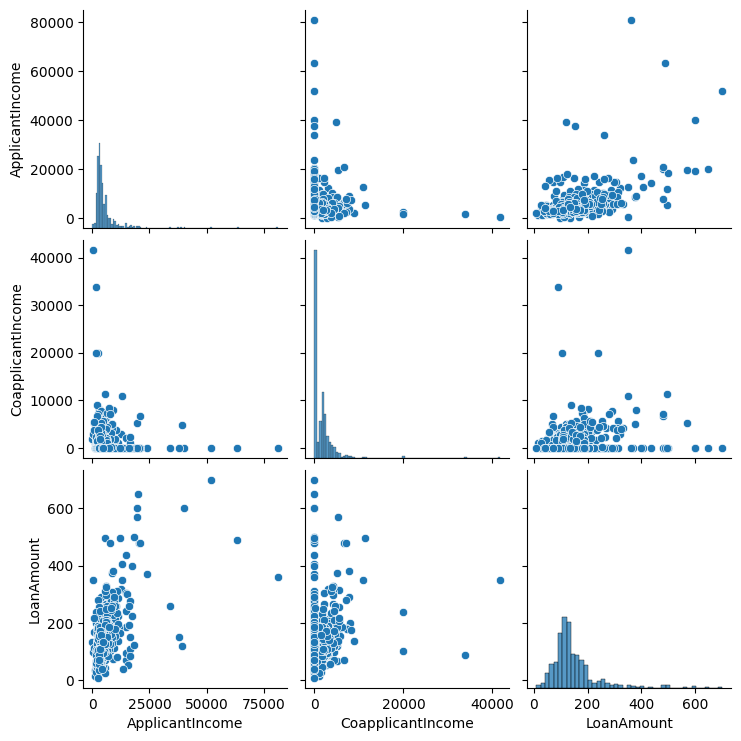

In [20]:
#查看两两特征之间的关系，同时也可以看两个特征之间是否具有强的相关性
sns.pairplot(data[numerical_columns])

### 离群值处理

In [21]:
data=data[data["CoapplicantIncome"]<30000]


### 编码离散型列

In [22]:
data_encoded = pd.get_dummies(data,drop_first=True)
data_encoded.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
6,2333,1516.0,95.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
7,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0,0,1,0,0
8,4006,1526.0,168.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
9,12841,10968.0,349.0,360.0,1.0,1,1,1,0,0,0,0,1,0,0


### 热力图分析相关性

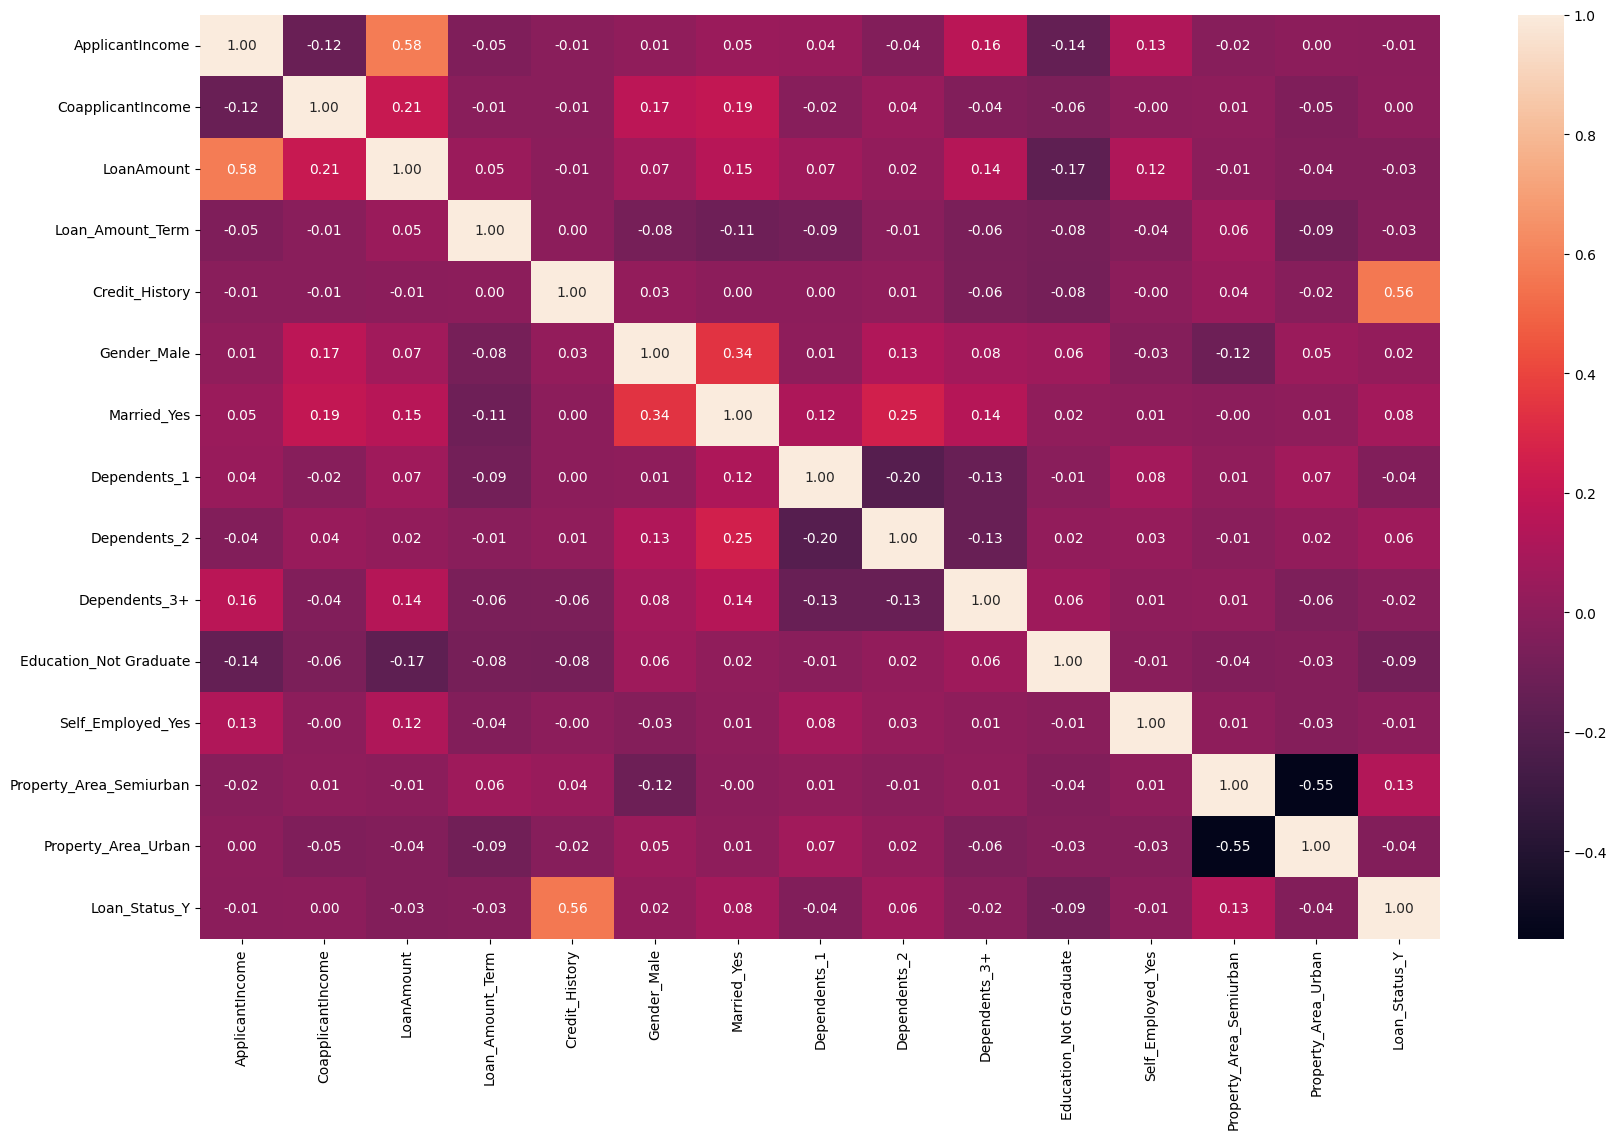

In [23]:
corr = data_encoded.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

可以看到，变量LoanAmount和applicationIcome、creditHistory和loanStatus相关性大于0.5.说明变量之间不存在很强的多重共线性。
- 多重共线性：多重共线性是指线性回归模型中的解释变量之间由于存在精确相关关系或高度相关关系而使模型估计失真或难以估计准确。

### 缺失值检查

In [24]:
pd.isnull(data_encoded).any()

ApplicantIncome            False
CoapplicantIncome          False
LoanAmount                  True
Loan_Amount_Term            True
Credit_History              True
Gender_Male                False
Married_Yes                False
Dependents_1               False
Dependents_2               False
Dependents_3+              False
Education_Not Graduate     False
Self_Employed_Yes          False
Property_Area_Semiurban    False
Property_Area_Urban        False
Loan_Status_Y              False
dtype: bool

In [25]:
########## Split Features and Target Varible ############
X = data_encoded.drop(columns='Loan_Status_Y')

#ligbtgbm feas importances
sel_cols=['Education_Not Graduate',
 'Dependents_1',
 'Property_Area_Semiurban',
 'Loan_Amount_Term',
 'Property_Area_Urban',
 'Married_Yes',
 'Credit_History',
 'CoapplicantIncome',
 'LoanAmount',
 'ApplicantIncome']

# X=X[sel_cols]

y = data_encoded['Loan_Status_Y']

# ################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =40)
# ############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test = imp_train.transform(X_test)

## LightGBM

LightGBM是一个梯度提升框架，它使用基于树的学习算法。但不建议在小型数据集上使用 LGBM。轻GBM对过拟合很敏感，很容易过度拟合小数据

In [26]:
# Note: 因为数据集只有600多条数据，数据集太小，LGBM就过拟合了，你可以看情况分析

In [27]:
#建模：增添网格搜索，希望通过参数寻优提高效果，但是效果提升不明显。对于模型效果提升，统一用的都是GridSearchCV，只能说有效果，但不多（笑死）
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [4,6,8],
    'num_leaves': [20,30,40],
}
clf = lgb.LGBMClassifier()

gsearch = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=5)
gsearch.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))

clf=gsearch.best_estimator_

scores = cross_val_score(clf, X_test, y_test, scoring='accuracy')
y_pred=clf.predict(X_test)
print("Cross_val_score Accuracy: {0:.1f}%".format(np.mean(scores) * 100))
print("train accuracy:",clf.score(X_train, y_train),"\n","test accuracy:",clf.score(X_test,y_test))
print('\n')
print(classification_report(y_pred, y_test))

参数的最佳取值:{'max_depth': 4, 'num_leaves': 20}
Cross_val_score Accuracy: 71.7%
train accuracy: 0.8834355828220859 
 test accuracy: 0.7804878048780488


              precision    recall  f1-score   support

           0       0.45      0.74      0.56        23
           1       0.93      0.79      0.85       100

    accuracy                           0.78       123
   macro avg       0.69      0.76      0.71       123
weighted avg       0.84      0.78      0.80       123



logloss is 0.2199066075813125
confusion_matrix


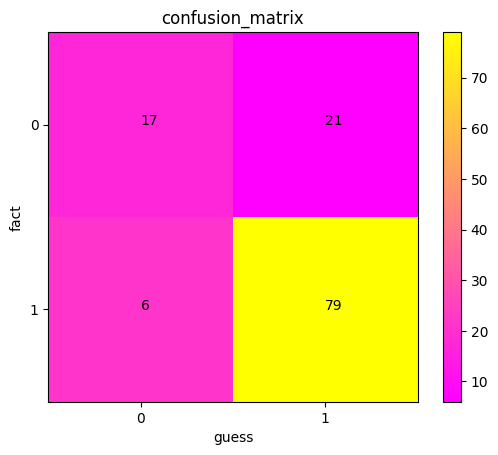

auc is 0.7080495356037152


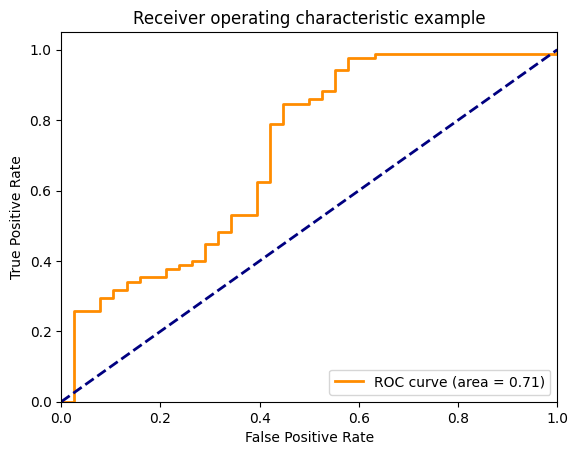

In [28]:
#LightGBM评价 
#模型评价统一采用三个指标：LogLoss，AUC，混淆矩阵
from sklearn.metrics import log_loss,roc_auc_score,confusion_matrix,roc_curve,auc
print('logloss is',log_loss(y_pred, clf.predict_proba(X_test)))
print('confusion_matrix')
# 预测数据，predict之后的预测结果集
guess = y_pred
# 真实结果集
fact = y_test
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.spring)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('guess')
plt.ylabel('fact')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.title('confusion_matrix')
plt.show() 

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
auc = auc(fpr, tpr)
print('auc is',auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#后面的评价大致相同，备注就直接c&p了，看要不要删除？？

Text(0.5, 0, 'Feature Importance Score')

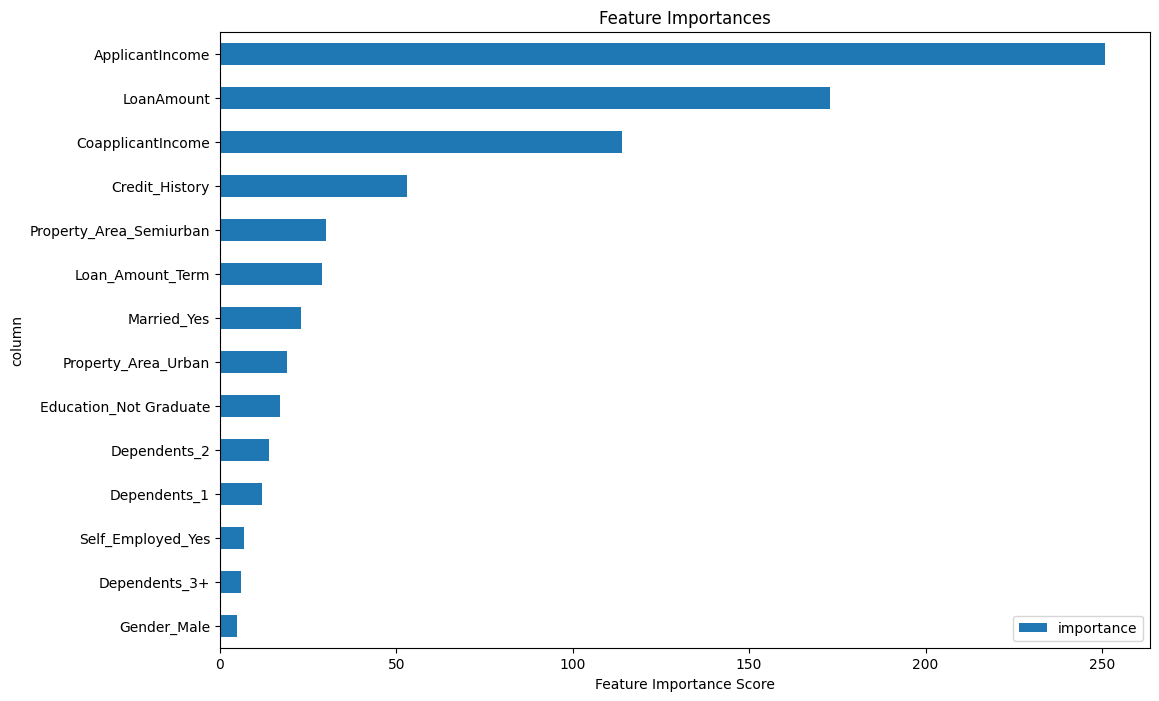

In [29]:
#根据模型，输出特征重要性。在训练完成后，对每个特征进行打分。特征分数越高，表示该特征重要性越高。
#我这边就是根据特征重要性进行排序，然后可视化输出结果。这个重要性也可以用来进行特征选择
#不是所有模型都可以进行这个操作，比如线性模型
feat_imp_split = pd.DataFrame({
        'column': list(X .columns),
        'importance': clf.feature_importances_, # 'importance': clf.feature_importance(importance_type='gain'),
    }).sort_values(by='importance', ascending=True)

feat_imp_split.plot(x='column', y='importance', kind='barh',figsize=(12,8),title='Feature Importances')
plt.xlabel('Feature Importance Score')

## XGBoost

XGBoost是一个梯度提升库，支持Java，Python，Java和C++，R和Julia。它还使用弱决策树的集合。它是一个线性模型，通过并行计算进行树学习。该算法还附带了用于执行交叉验证和显示功能重要性的功能。

In [30]:
import xgboost as xgb

cv_params = {'n_estimators': np.linspace(100, 1000, 10, dtype=int),'max_depth': np.linspace(1, 10, 10, dtype=int)}

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.03, 'alpha': 10}

classification = xgb.XGBClassifier(**params)
gsearch = GridSearchCV(classification, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gsearch.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))

classification=gsearch.best_estimator_

classification.fit(X_train, y_train)
scores = cross_val_score(classification, X_test, y_test, scoring='accuracy')
y_pred = classification.predict(X_test)
print("Cross_val_score Accuracy: {0:.1f}%".format(np.mean(scores) * 100))
print("train accuracy:",classification.score(X_train, y_train),"\n","test accuracy:",classification.score(X_test,y_test))
print('\n')
print(classification_report(y_pred, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
参数的最佳取值:{'max_depth': 1, 'n_estimators': 100}
Cross_val_score Accuracy: 69.1%
train accuracy: 0.8139059304703476 
 test accuracy: 0.8048780487804879


              precision    recall  f1-score   support

           0       0.39      0.94      0.56        16
           1       0.99      0.79      0.88       107

    accuracy                           0.80       123
   macro avg       0.69      0.86      0.72       123
weighted avg       0.91      0.80      0.83       123



logloss is 0.3562423087717072
confusion_matrix


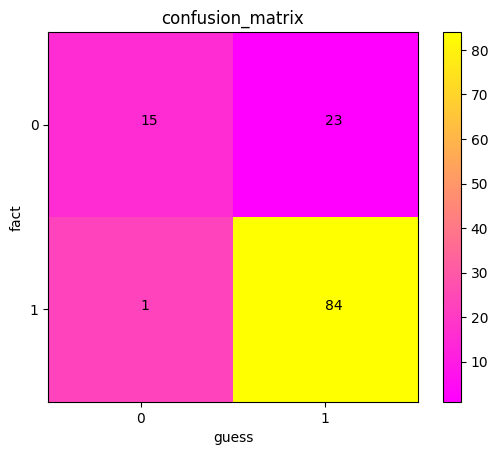

auc is 0.753250773993808


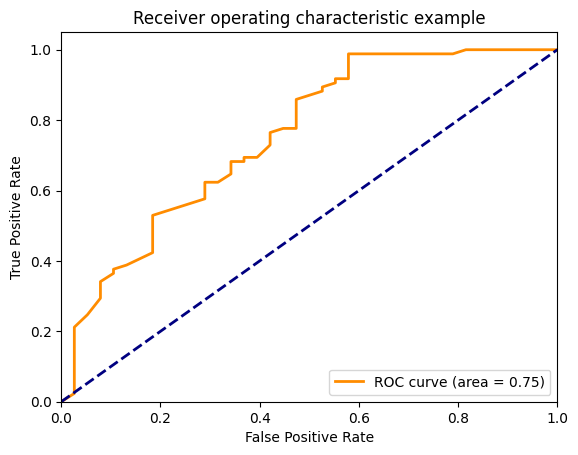

In [31]:
from sklearn.metrics import auc
print('logloss is',log_loss(y_pred, classification.predict_proba(X_test)))
print('confusion_matrix')
# 预测数据，predict之后的预测结果集
guess = y_pred
# 真实结果集
fact = y_test
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.spring)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('guess')
plt.ylabel('fact')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.title('confusion_matrix')
plt.show() 

fpr, tpr, thresholds = roc_curve(y_test, classification.predict_proba(X_test)[:,1])
auc = auc(fpr, tpr)
print('auc is',auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Feature Importance Score')

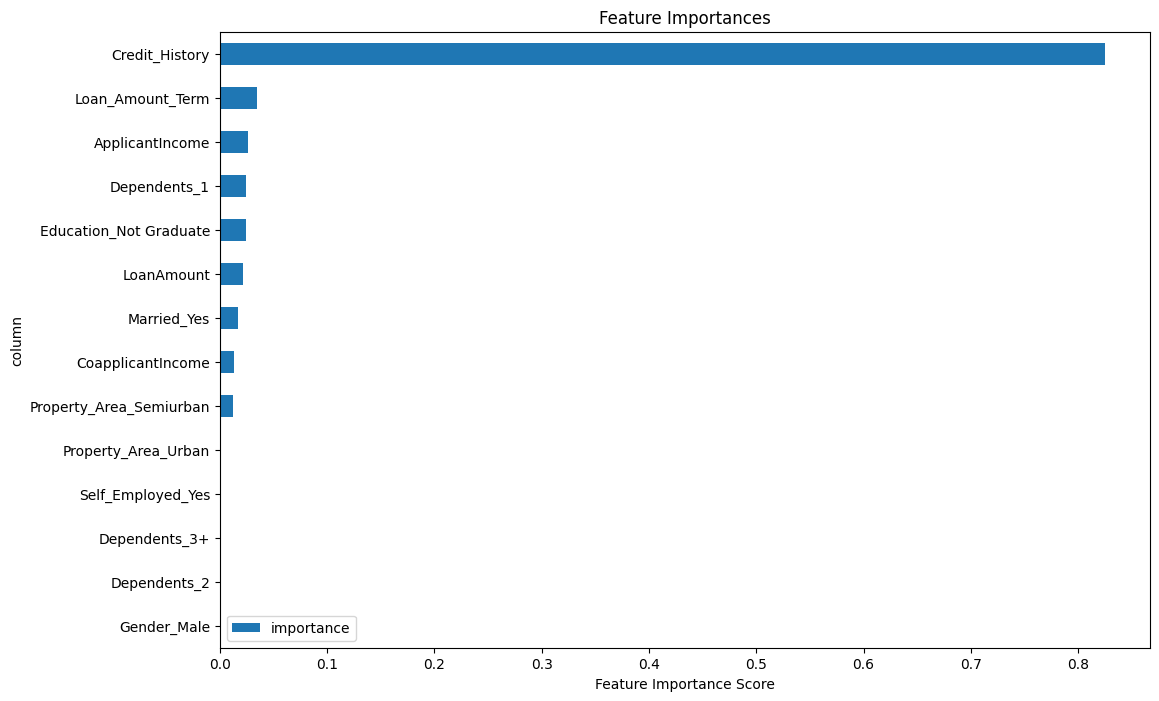

In [32]:
feat_imp_split = pd.DataFrame({
        'column': list(X .columns),
        'importance': classification.feature_importances_, # 'importance': clf.feature_importance(importance_type='gain'),
    }).sort_values(by='importance', ascending=True)

feat_imp_split.plot(x='column', y='importance', kind='barh',figsize=(12,8),title='Feature Importances')
plt.xlabel('Feature Importance Score')

## Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

cv_params = {'learning_rate': [0.001,0.01,0.05,0.1],'max_depth': [5,6,7,8],'n_estimators':list(range(100,300,50))}

gbc = GradientBoostingClassifier(loss='deviance', subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1)

gsearch = GridSearchCV(gbc, param_grid=cv_params, scoring='accuracy', cv=5)
gsearch.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))

gbc=gsearch.best_estimator_
y_pred = gbc.predict(X_test)
scores = cross_val_score(gbc, X_test, y_test, scoring='accuracy')
print("Cross_val_score Accuracy: {0:.1f}%".format(np.mean(scores) * 100))
print("train accuracy:",gbc.score(X_train, y_train),"\n","test accuracy:",gbc.score(X_test,y_test))
print('\n')
print(classification_report(y_pred, y_test))

参数的最佳取值:{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Cross_val_score Accuracy: 78.1%
train accuracy: 0.8282208588957055 
 test accuracy: 0.8048780487804879


              precision    recall  f1-score   support

           0       0.39      0.94      0.56        16
           1       0.99      0.79      0.88       107

    accuracy                           0.80       123
   macro avg       0.69      0.86      0.72       123
weighted avg       0.91      0.80      0.83       123



logloss is 0.2940809925759321
confusion_matrix


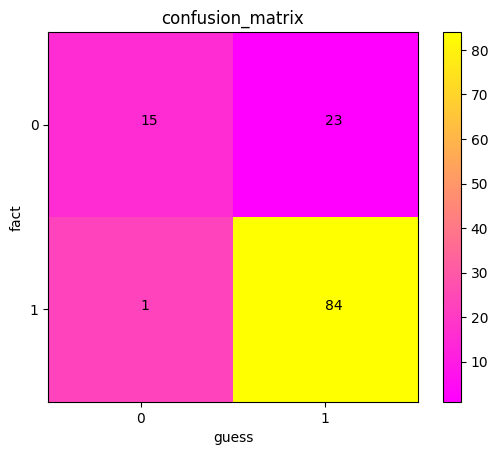

auc is 0.734984520123839


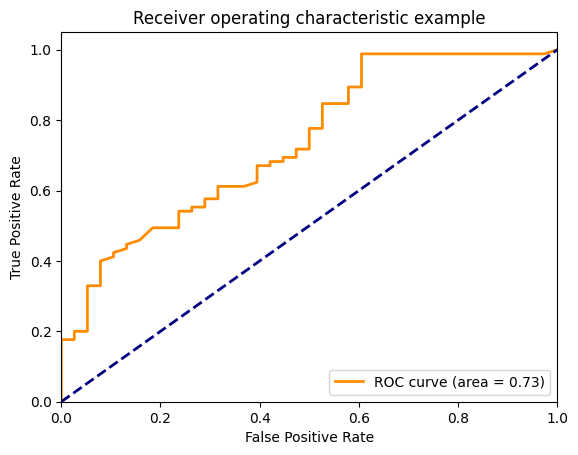

In [34]:
from sklearn.metrics import auc
print('logloss is',log_loss(y_pred, gbc.predict_proba(X_test)))
print('confusion_matrix')
# 预测数据，predict之后的预测结果集
guess = y_pred
# 真实结果集
fact = y_test
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.spring)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('guess')
plt.ylabel('fact')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.title('confusion_matrix')
plt.show() 

fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
auc = auc(fpr, tpr)
print('auc is',auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Feature Importance Score')

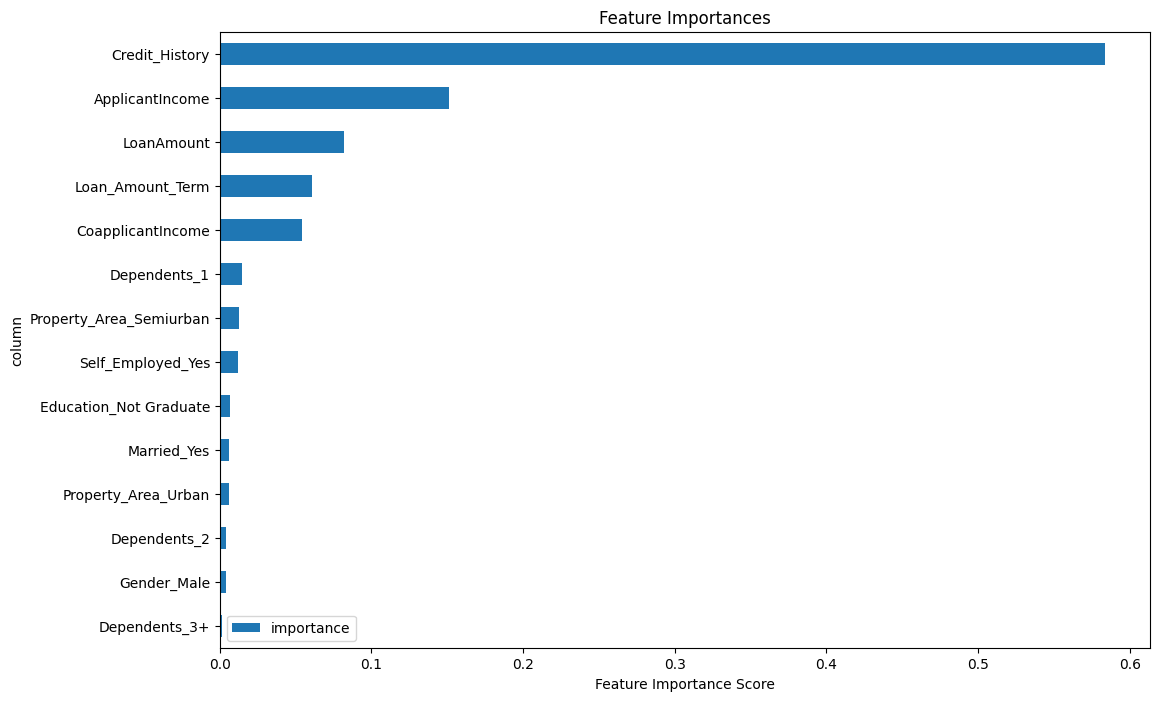

In [35]:
feat_imp_split = pd.DataFrame({
        'column': list(X .columns),
        'importance': gbc.feature_importances_, # 'importance': clf.feature_importance(importance_type='gain'),
    }).sort_values(by='importance', ascending=True)

feat_imp_split.plot(x='column', y='importance', kind='barh',figsize=(12,8),title='Feature Importances')
plt.xlabel('Feature Importance Score')

## AdaBoost

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

cv_params = {'n_estimators':list(range(100,300,50))}

base_estimator=DecisionTreeClassifier(max_depth=1,criterion='gini', splitter='best', min_samples_split=2)
model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=100)

gsearch = GridSearchCV(model, param_grid=cv_params, scoring='accuracy', cv=5)
gsearch.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))

model=gsearch.best_estimator_

y_pred=model.predict(X_test)
scores = cross_val_score(model, X_test, y_test, scoring='accuracy')
print("Cross_val_score Accuracy: {0:.1f}%".format(np.mean(scores) * 100))
print("train accuracy:",model.score(X_train, y_train),"\n","test accuracy:",model.score(X_test,y_test))
print('\n')
print(classification_report(y_pred, y_test))

参数的最佳取值:{'n_estimators': 100}
Cross_val_score Accuracy: 72.5%
train accuracy: 0.8650306748466258 
 test accuracy: 0.7398373983739838


              precision    recall  f1-score   support

           0       0.47      0.60      0.53        30
           1       0.86      0.78      0.82        93

    accuracy                           0.74       123
   macro avg       0.67      0.69      0.67       123
weighted avg       0.76      0.74      0.75       123



logloss is 0.678637540659703
confusion_matrix


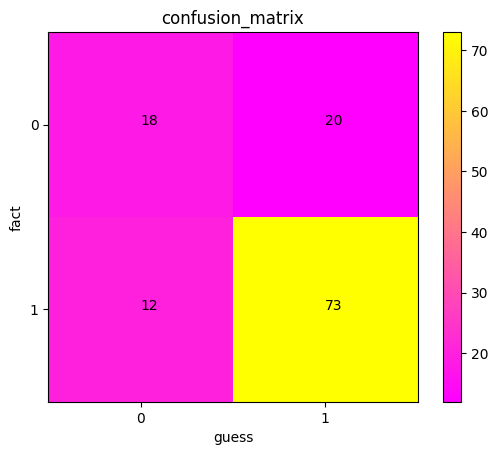

auc is 0.753250773993808


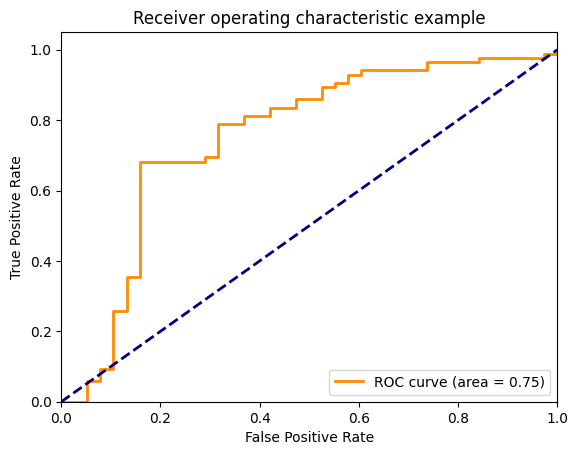

In [37]:
from sklearn.metrics import auc
print('logloss is',log_loss(y_pred, model.predict_proba(X_test)))
print('confusion_matrix')
# 预测数据，predict之后的预测结果集
guess = y_pred
# 真实结果集
fact = y_test
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.spring)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('guess')
plt.ylabel('fact')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.title('confusion_matrix')
plt.show() 

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = auc(fpr, tpr)
print('auc is',auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Feature Importance Score')

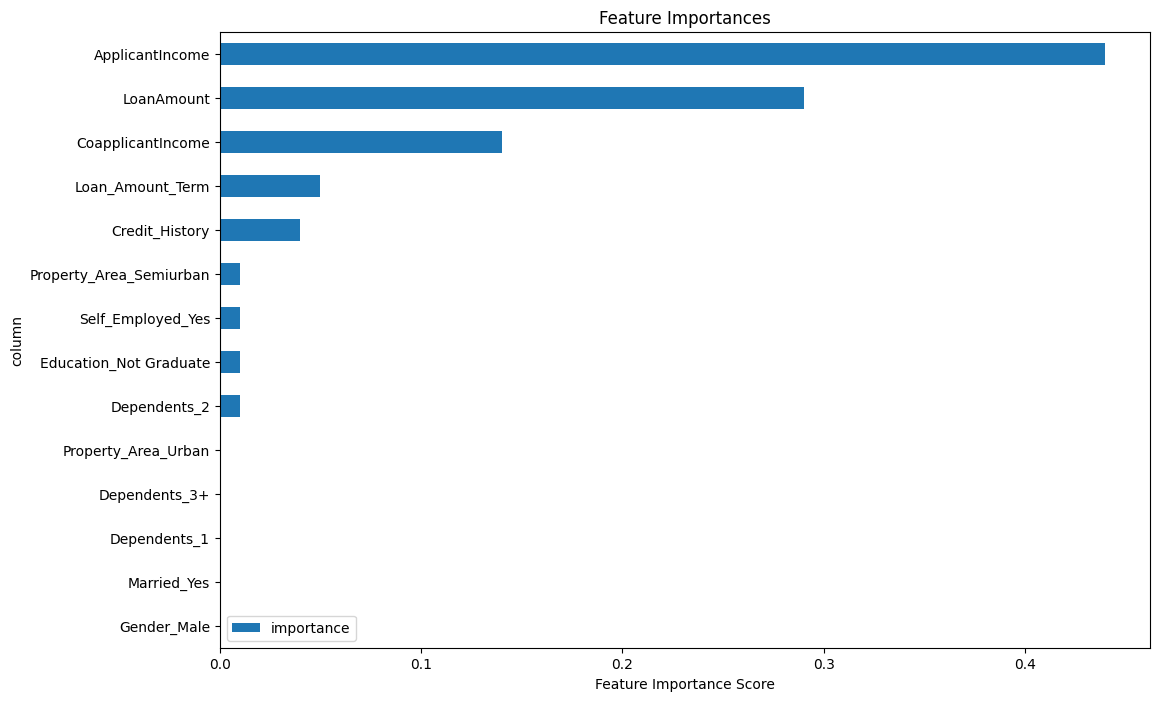

In [38]:
feat_imp_split = pd.DataFrame({
        'column': list(X .columns),
        'importance': model.feature_importances_, # 'importance': clf.feature_importance(importance_type='gain'),
    }).sort_values(by='importance', ascending=True)

feat_imp_split.plot(x='column', y='importance', kind='barh',figsize=(12,8),title='Feature Importances')
plt.xlabel('Feature Importance Score')

###  Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=2.0).fit(X_train,y_train)
scores = cross_val_score(logreg, X_test, y_test, scoring='accuracy')
y_pred=logreg.predict(X_test)
print("Cross_val_score Accuracy: {0:.1f}%".format(np.mean(scores) * 100))
print("train accuracy:",logreg.score(X_train, y_train),"\n","test accuracy:",logreg.score(X_test,y_test))
print('\n')
print(classification_report(y_pred, y_test))

Cross_val_score Accuracy: 79.7%
train accuracy: 0.8139059304703476 
 test accuracy: 0.8048780487804879


              precision    recall  f1-score   support

           0       0.39      0.94      0.56        16
           1       0.99      0.79      0.88       107

    accuracy                           0.80       123
   macro avg       0.69      0.86      0.72       123
weighted avg       0.91      0.80      0.83       123



logloss is 0.23475565541819085
confusion_matrix


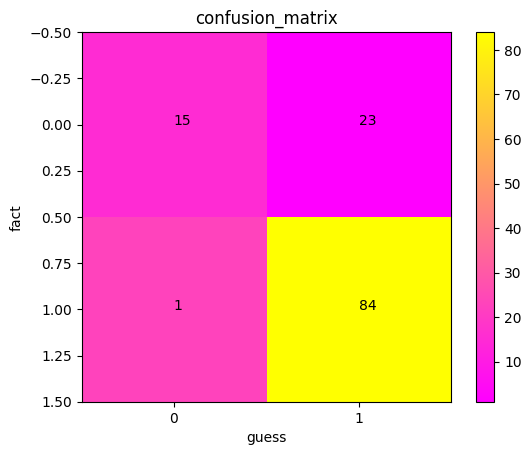

auc is 0.7628482972136224


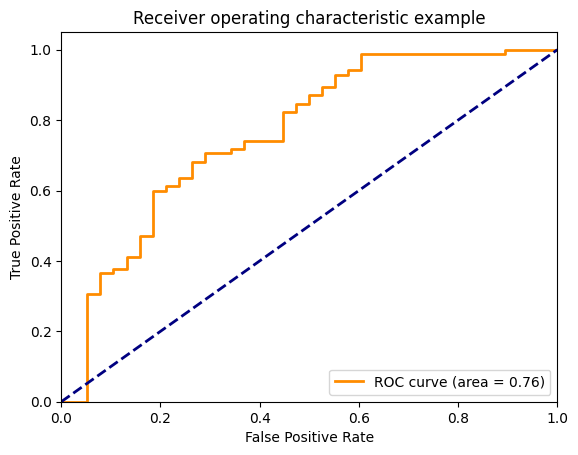

In [40]:
from sklearn.metrics import log_loss,roc_auc_score,confusion_matrix,roc_curve,auc
print('logloss is',log_loss(y_pred, logreg.predict_proba(X_test)))
print('confusion_matrix')
# 预测数据，predict之后的预测结果集
guess = y_pred
# 真实结果集
fact = y_test
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.spring)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('guess')
plt.ylabel('fact')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.title('confusion_matrix')
plt.show() 

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
auc = auc(fpr, tpr)
print('auc is',auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Decision Tree


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

cv_params = {'max_depth': [3,4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2)

gsearch = GridSearchCV(tree_clf, param_grid=cv_params, scoring='accuracy', cv=5)
gsearch.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))

tree_clf=gsearch.best_estimator_

y_pred = tree_clf.predict(X_test)

scores = cross_val_score(tree_clf, X_test, y_test, scoring='accuracy')
print("Cross_val_score Accuracy: {0:.1f}%".format(np.mean(scores) * 100))
print("train accuracy:",tree_clf.score(X_train, y_train),"\n","test accuracy:",tree_clf.score(X_test,y_test))
print('\n')
print(classification_report(y_pred, y_test))

参数的最佳取值:{'max_depth': 3}
Cross_val_score Accuracy: 77.3%
train accuracy: 0.8220858895705522 
 test accuracy: 0.7886178861788617


              precision    recall  f1-score   support

           0       0.39      0.83      0.54        18
           1       0.96      0.78      0.86       105

    accuracy                           0.79       123
   macro avg       0.68      0.81      0.70       123
weighted avg       0.88      0.79      0.82       123



logloss is 0.19254364010440922
confusion_matrix


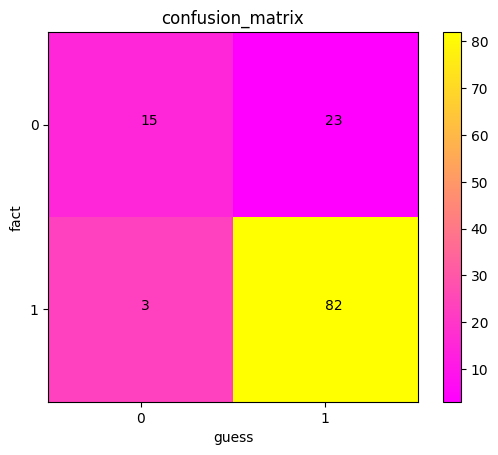

auc is 0.6789473684210526


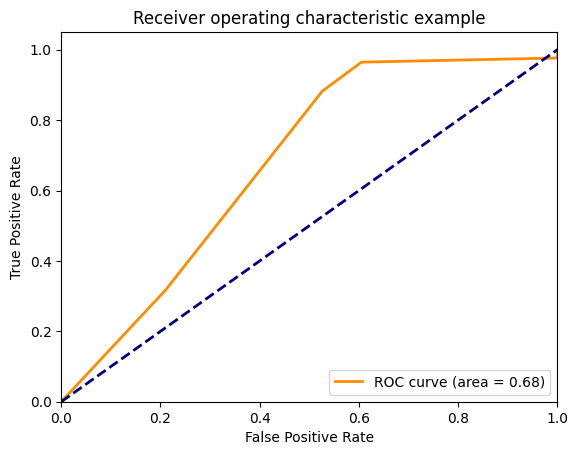

In [42]:
from sklearn.metrics import log_loss,roc_auc_score,confusion_matrix,roc_curve,auc
print('logloss is',log_loss(y_pred, tree_clf.predict_proba(X_test)))

print('confusion_matrix')
# 预测数据，predict之后的预测结果集
guess = y_pred
# 真实结果集
fact = y_test
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.spring)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('guess')
plt.ylabel('fact')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.title('confusion_matrix')
plt.show() 

fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
auc = auc(fpr, tpr)
print('auc is',auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Feature Importance Score')

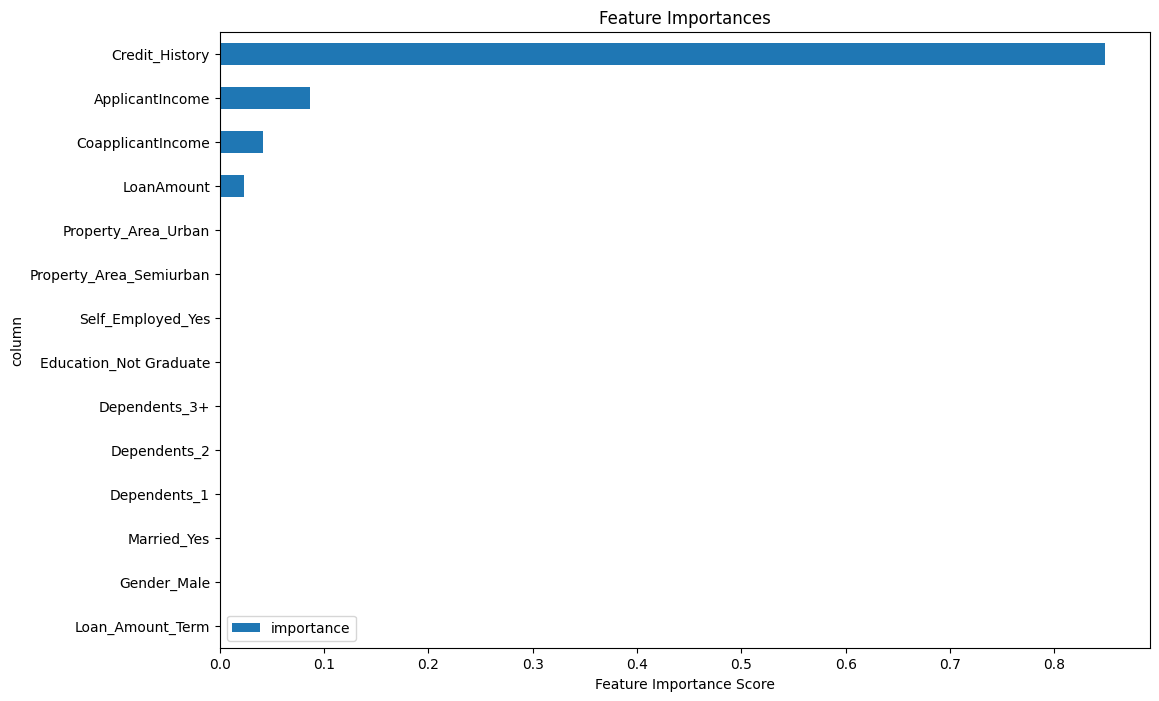

In [43]:
feat_imp_split = pd.DataFrame({
        'column': list(X .columns),
        'importance': tree_clf.feature_importances_, # 'importance': clf.feature_importance(importance_type='gain'),
    }).sort_values(by='importance', ascending=True)

feat_imp_split.plot(x='column', y='importance', kind='barh',figsize=(12,8),title='Feature Importances')
plt.xlabel('Feature Importance Score')

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

cv_params = {'max_depth': [5,6,7,8],'n_estimators':list(range(100,300,50))}

rf_clf = RandomForestClassifier(min_samples_leaf = 10)

gsearch = GridSearchCV(rf_clf, param_grid=cv_params, scoring='accuracy', cv=5)
gsearch.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(gsearch.best_params_))

rf_clf=gsearch.best_estimator_

rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
scores = cross_val_score(rf_clf, X_test, y_test, scoring='accuracy')
print("Cross_val_score Accuracy: {0:.1f}%".format(np.mean(scores) * 100))
print("train accuracy:",rf_clf.score(X_train, y_train),"\n","test accuracy:",tree_clf.score(X_test,y_test))
print('\n')
print(classification_report(y_pred, y_test))

参数的最佳取值:{'max_depth': 5, 'n_estimators': 150}
Cross_val_score Accuracy: 69.1%
train accuracy: 0.8139059304703476 
 test accuracy: 0.7886178861788617


              precision    recall  f1-score   support

           0       0.39      0.94      0.56        16
           1       0.99      0.79      0.88       107

    accuracy                           0.80       123
   macro avg       0.69      0.86      0.72       123
weighted avg       0.91      0.80      0.83       123



logloss is 0.2994489375868377
confusion_matrix


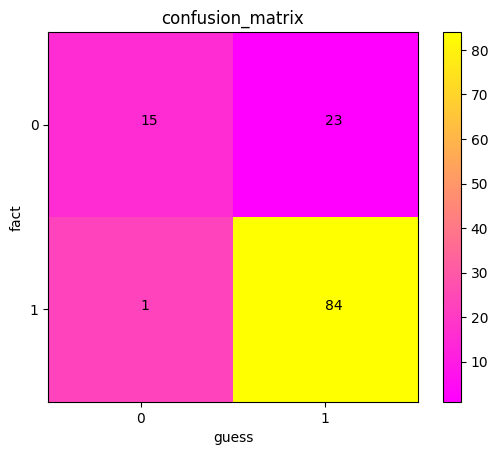

auc is 0.7634674922600619


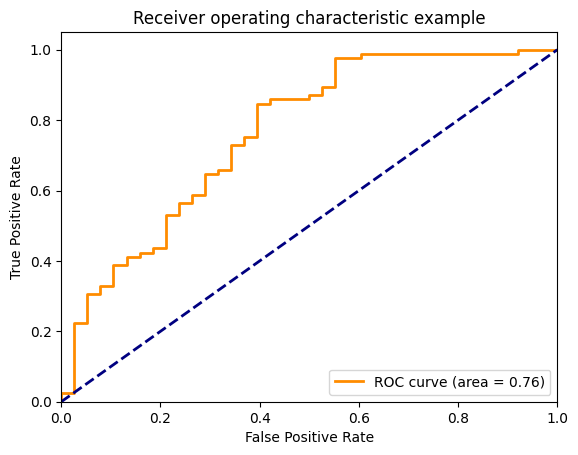

In [45]:
from sklearn.metrics import auc
print('logloss is',log_loss(y_pred, rf_clf.predict_proba(X_test)))
print('confusion_matrix')
# 预测数据，predict之后的预测结果集
guess = y_pred
# 真实结果集
fact = y_test
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.spring)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('guess')
plt.ylabel('fact')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.title('confusion_matrix')
plt.show() 

fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
auc = auc(fpr, tpr)

print('auc is',auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Feature Importance Score')

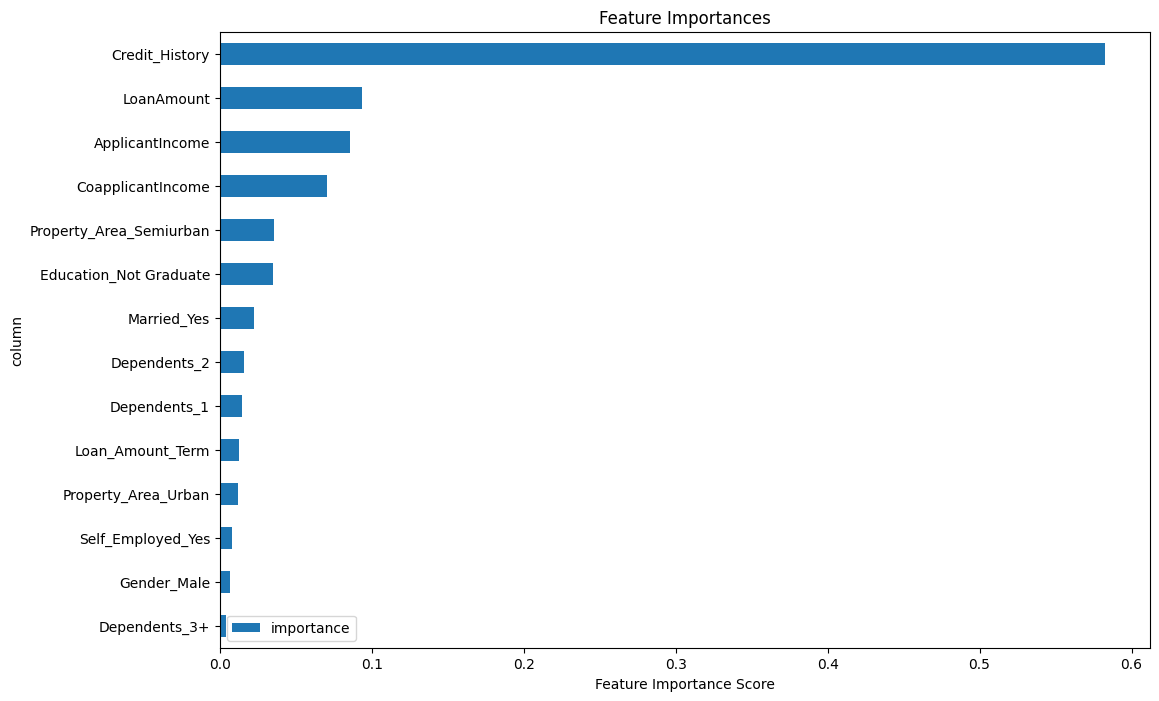

In [46]:
feat_imp_split = pd.DataFrame({
        'column': list(X .columns),
        'importance': rf_clf.feature_importances_, # 'importance': clf.feature_importance(importance_type='gain'),
    }).sort_values(by='importance', ascending=True)

feat_imp_split.plot(x='column', y='importance', kind='barh',figsize=(12,8),title='Feature Importances')
plt.xlabel('Feature Importance Score')